## Daily Forecast
    June to September for Retail Groups at all Chain 1 Locations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Complete')

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Complete


In [2]:
!pip install fbprophet
print('complete')

  Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.python.org', port=443): Read timed out. (read timeout=15)",)': /simple/pystan/
    100% |################################| 62.4MB 22kB/s  eta 0:00:01    83% |##########################      | 52.0MB 42.5MB/s eta 0:00:01
  Running setup.py bdist_wheel for fbprophet ... - \ | / - \ | / done
  Stored in directory: /home/nbuser/.cache/pip/wheels/43/f2/6c/5ed49d64b0aab1affc668d4555481db950fc4cc51658198951
Successfully built fbprophet
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
complete


In [3]:
from fbprophet import Prophet

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/DailyFcst/master/daily_data_LY-YTD_6.3.csv', parse_dates=['ds'])
sales = pd.DataFrame(data[['ds','sls']])
sales['y'] = np.log10(sales['sls'])
del sales['sls']
sales

,ds,y
0,2016-01-31,6.718094
1,2016-02-01,6.641434
2,2016-02-02,6.720208
3,2016-02-03,6.596672
4,2016-02-04,6.593270
5,2016-02-05,6.685655
6,2016-02-06,6.732530
7,2016-02-07,6.571926
8,2016-02-08,6.517579
9,2016-02-09,6.563545


In [5]:
#read in dates with Scratcher Event & Holidays listed
events_16 = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/DailyFcst/master/2016_events.csv', parse_dates=['ds'])
events_17 = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/DailyFcst/master/2017_events.csv', parse_dates=['ds'])

all_events = events_16.append(events_17)
all_events

,ds,holiday,lower_window,upper_window
0,2016-01-27,scratch,0,7
1,2016-03-16,scratch,0,7
2,2016-03-27,holiday,-2,2
3,2016-04-01,scratch,0,7
4,2016-06-17,scratch,0,7
5,2016-07-04,holiday,-2,2
6,2016-07-15,scratch,0,7
7,2016-08-12,scratch,0,7
8,2016-10-14,scratch,0,7
9,2016-11-09,scratch,0,7


In [8]:
#forecasting tool used to fit model & plot data
m = Prophet(holidays=all_events)
m.fit(sales)

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [7]:
#create future dataframe with number of periods to be forecasted
future = m.make_future_dataframe(periods=125)
future

,ds
0,2016-01-31
1,2016-02-01
2,2016-02-02
3,2016-02-03
4,2016-02-04
5,2016-02-05
6,2016-02-06
7,2016-02-07
8,2016-02-08
9,2016-02-09


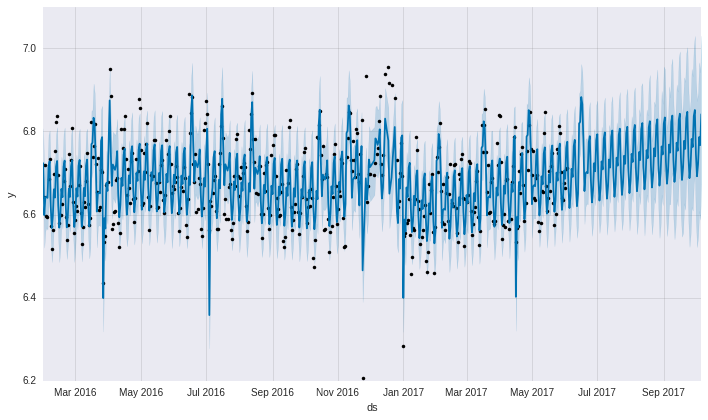

In [11]:
forecast = m.predict(future)
m.plot(forecast)

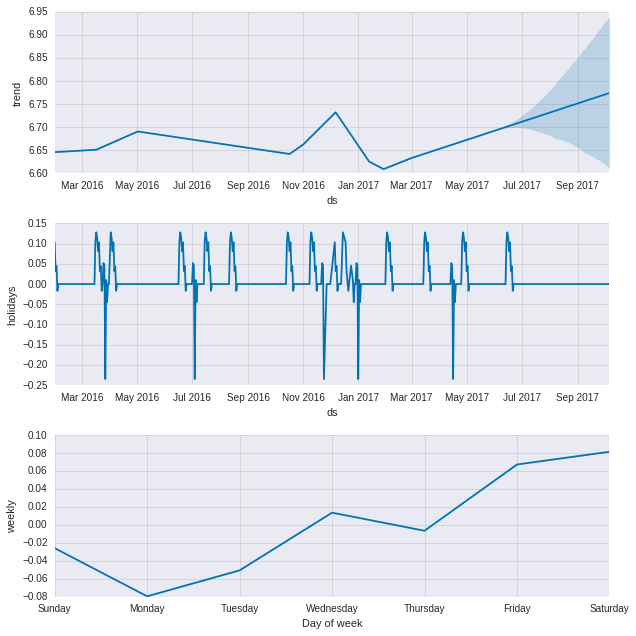

In [12]:
m.plot_components(forecast)

In [13]:
forecast

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,holiday,holiday_lower,holiday_upper,scratch,scratch_lower,scratch_upper,weekly,weekly_lower,weekly_upper,seasonal,yhat
0,2016-01-31,0.000000,6.646048,0.077396,0.077396,6.646048,6.646048,6.645047,6.807351,0.0,0.0,0.0,0.103269,0.103269,0.103269,-0.025873,-0.025873,-0.025873,0.077396,6.723444
1,2016-02-01,0.002045,6.646163,-0.047570,-0.047570,6.646163,6.646163,6.520411,6.677766,0.0,0.0,0.0,0.031876,0.031876,0.031876,-0.079446,-0.079446,-0.079446,-0.047570,6.598593
2,2016-02-02,0.004090,6.646278,-0.006024,-0.006024,6.646278,6.646278,6.560895,6.719962,0.0,0.0,0.0,0.044525,0.044525,0.044525,-0.050550,-0.050550,-0.050550,-0.006024,6.640254
3,2016-02-03,0.006135,6.646393,-0.003177,-0.003177,6.646393,6.646393,6.568884,6.719863,0.0,0.0,0.0,-0.016822,-0.016822,-0.016822,0.013645,0.013645,0.013645,-0.003177,6.643216
4,2016-02-04,0.008180,6.646509,-0.006459,-0.006459,6.646509,6.646509,6.563612,6.719656,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.006459,-0.006459,-0.006459,-0.006459,6.640049
5,2016-02-05,0.010225,6.646624,0.067252,0.067252,6.646624,6.646624,6.630323,6.791867,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.067252,0.067252,0.067252,0.067252,6.713876
6,2016-02-06,0.012270,6.646739,0.081431,0.081431,6.646739,6.646739,6.650106,6.802229,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.081431,0.081431,0.081431,0.081431,6.728170
7,2016-02-07,0.014315,6.646854,-0.025873,-0.025873,6.646854,6.646854,6.544628,6.703260,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.025873,-0.025873,-0.025873,-0.025873,6.620981
8,2016-02-08,0.016360,6.646970,-0.079446,-0.079446,6.646970,6.646970,6.485584,6.640912,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.079446,-0.079446,-0.079446,-0.079446,6.567523
9,2016-02-09,0.018405,6.647085,-0.050550,-0.050550,6.647085,6.647085,6.517068,6.674573,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.050550,-0.050550,-0.050550,-0.050550,6.596535


In [14]:
forecast.to_csv('Jun-Jul_DailyFcst_Output.csv')